### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [2]:
### Data Collection
import pandas_datareader as pdr


In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("C:/Users/91807/Downloads/Datasetsforml/newntfx.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,31-01-2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,01-02-2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,02-02-2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,03-02-2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,04-02-2022,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [9]:
df1=df.reset_index()['High']

In [10]:
df1

0       267.899994
1       266.700012
2       272.450012
3       267.619995
4       255.800003
           ...    
1004    427.700012
1005    458.480011
1006    451.980011
1007    429.260010
1008    412.769989
Name: High, Length: 1009, dtype: float64

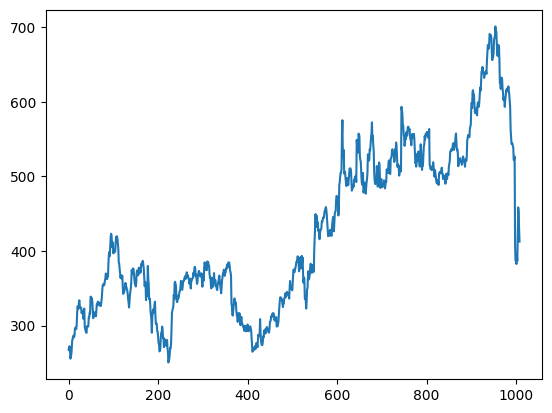

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0       267.899994
1       266.700012
2       272.450012
3       267.619995
4       255.800003
           ...    
1004    427.700012
1005    458.480011
1006    451.980011
1007    429.260010
1008    412.769989
Name: High, Length: 1009, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.03830439]
 [0.03563978]
 [0.04840791]
 ...
 [0.44706226]
 [0.39661149]
 [0.35999466]]


In [17]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.67)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(676, 333)

In [19]:
train_data

array([[0.03830439],
       [0.03563978],
       [0.04840791],
       [0.03768264],
       [0.01143582],
       [0.01887463],
       [0.02389308],
       [0.0427011 ],
       [0.06628327],
       [0.06952524],
       [0.07807435],
       [0.07991744],
       [0.07516544],
       [0.07849626],
       [0.0999245 ],
       [0.10372161],
       [0.10014657],
       [0.0990363 ],
       [0.11220411],
       [0.1471333 ],
       [0.16685175],
       [0.16229959],
       [0.16047879],
       [0.17939781],
       [0.18503801],
       [0.16696275],
       [0.1626105 ],
       [0.16154461],
       [0.16312118],
       [0.14733314],
       [0.1528845 ],
       [0.15266243],
       [0.14093796],
       [0.13039038],
       [0.15628193],
       [0.16043434],
       [0.1069192 ],
       [0.09925837],
       [0.09375139],
       [0.09015412],
       [0.0880668 ],
       [0.10771864],
       [0.10703027],
       [0.10858461],
       [0.10725234],
       [0.13543106],
       [0.13429856],
       [0.148

In [20]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [21]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(575, 100)
(575,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(232, 100)
(232,)


(None, None)

In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
9/9 [==============================] - 7s 314ms/step - loss: 0.0296 - val_loss: 0.0127
Epoch 2/100
9/9 [==============================] - 2s 190ms/step - loss: 0.0087 - val_loss: 0.0476
Epoch 3/100
9/9 [==============================] - 2s 178ms/step - loss: 0.0055 - val_loss: 0.0107
Epoch 4/100
9/9 [==============================] - 2s 181ms/step - loss: 0.0038 - val_loss: 0.0080
Epoch 5/100
9/9 [==============================] - 2s 174ms/step - loss: 0.0030 - val_loss: 0.0078
Epoch 6/100
9/9 [==============================] - 2s 177ms/step - loss: 0.0029 - val_loss: 0.0088
Epoch 7/100
9/9 [==============================] - 2s 185ms/step - loss: 0.0027 - val_loss: 0.0075
Epoch 8/100
9/9 [==============================] - 2s 191ms/step - loss: 0.0026 - val_loss: 0.0070
Epoch 9/100
9/9 [==============================] - 2s 175ms/step - loss: 0.0026 - val_loss: 0.0068
Epoch 10/100
9/9 [==============================] - 2s 173ms/step - loss: 0.0026 - val_loss: 0.0073
Epoch 11/

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.11.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

8/8 [==============================] - 0s 29ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

378.1958329988103

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

565.0280760307869

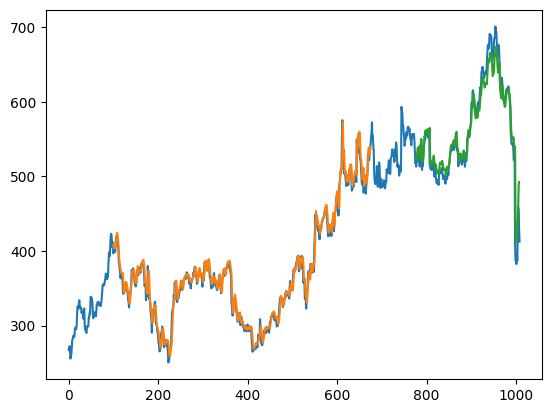

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:
len(test_data)

333

In [41]:
x_input=test_data[233:].reshape(1,-1)
x_input.shape


(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
temp_input

[0.7415952479601655,
 0.7479459719140733,
 0.7541636053129954,
 0.7569392859345319,
 0.7355109782432026,
 0.7660879181603937,
 0.7742372787159681,
 0.7601589666488338,
 0.7614913755073176,
 0.7747257341095681,
 0.7976862241656189,
 0.8179375788776264,
 0.8090331732382925,
 0.8337700722455927,
 0.8654350589815254,
 0.8642803314320764,
 0.8797575976351875,
 0.8730070557623755,
 0.8632810597617893,
 0.859372879241221,
 0.847204339807295,
 0.8576409255908062,
 0.8632810597617893,
 0.8610382876141429,
 0.8667895578166678,
 0.8587956509197108,
 0.895678863931064,
 0.9211041250708718,
 0.9442421609827432,
 0.9455966598178855,
 0.934316256022705,
 0.9462850241709375,
 0.9777501019474182,
 0.975529557450189,
 0.9704445594035132,
 0.9742417393457539,
 0.9665808319632352,
 0.9215038075365616,
 0.9000977252751052,
 0.9100901755126363,
 0.9097127206973639,
 0.9219034877817069,
 0.9608074717840516,
 0.9650708794694751,
 0.9719545118972732,
 1.0,
 0.9794599634006302,
 0.9848336433346683,
 0.952236065

In [44]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.42743695]
101
1 day input [0.74794597 0.75416361 0.75693929 0.73551098 0.76608792 0.77423728
 0.76015897 0.76149138 0.77472573 0.79768622 0.81793758 0.80903317
 0.83377007 0.86543506 0.86428033 0.8797576  0.87300706 0.86328106
 0.85937288 0.84720434 0.85764093 0.86328106 0.86103829 0.86678956
 0.85879565 0.89567886 0.92110413 0.94424216 0.94559666 0.93431626
 0.94628502 0.9777501  0.97552956 0.97044456 0.97424174 0.96658083
 0.92150381 0.90009773 0.91009018 0.90971272 0.92190349 0.96080747
 0.96507088 0.97195451 1.         0.97945996 0.98483364 0.95223607
 0.92325799 0.91217749 0.94541898 0.92672203 0.94313189 0.89681136
 0.83206021 0.83237112 0.8141404  0.8398988  0.84782616 0.84289648
 0.81513967 0.80381495 0.78083223 0.78838214 0.78203141 0.76075856
 0.78214241 0.79311191 0.80865572 0.81323004 0.8090554  0.8166274
 0.8067904  0.82151262 0.80701254 0.79793045 0.7766576  0.75984819
 0.69438645 0.67233646 0.65070838 0.65119683 0.65199633 0.64426874
 0.63889506 0.60198963 0.60523167 

In [45]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [46]:
import matplotlib.pyplot as plt

In [48]:
len(df1)

1009

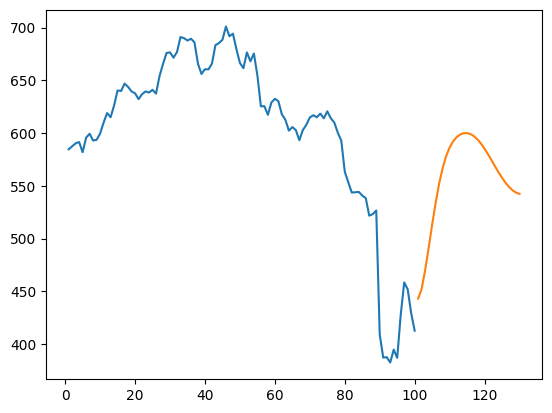

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[909:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

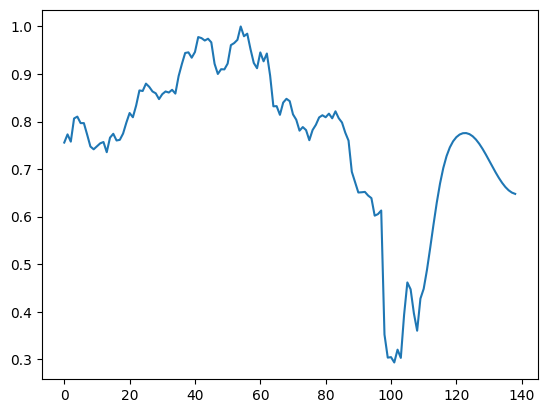

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [55]:
df3=scaler.inverse_transform(df3).tolist()

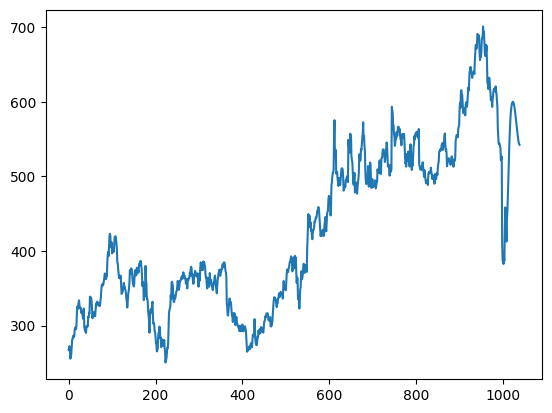

In [56]:
plt.plot(df3)